## K-Nearest Neighbor Classification - Fruits

K-Nearest Neighbours (KNN) Classification is one of the algorithms in the realm of Supervised Machine Learning, specifically categorized under Classification. Classification tasks involve the prediction of categorical values by utilising labelled datasets. 

KNN involves plotting data points in a feature space, with each axis representing a feature. KNN memorizes the dataset during prediction, computing distances to find k-nearest neighbours. Unlike explicit decision boundaries, KNN dynamically classifies each point based on the majority class among its neighbors, assigning it to the corresponding classification region. 

The focus here is to create a predictive model for fruit types using a fruits dataset. This dataset encapsulates crucial features such as mass, width, height, and color_scheme and the target being the fruit type itself.

### Import Libraries

In [34]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting._misc import scatter_matrix
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [35]:
fruits = pd.read_table(r"C:\Users\asifs\Desktop\Applied ML with Python\fruit_data_with_colors.txt")

### Data Visualization

In [36]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [37]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [38]:
fruits.shape

(59, 7)

In [39]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

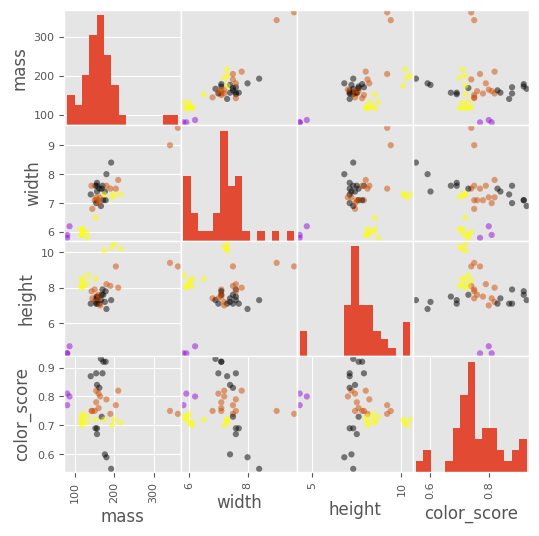

In [40]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s = 20, hist_kwds = {'bins':15}, figsize = (6, 6), cmap = cmap)
plt.show()

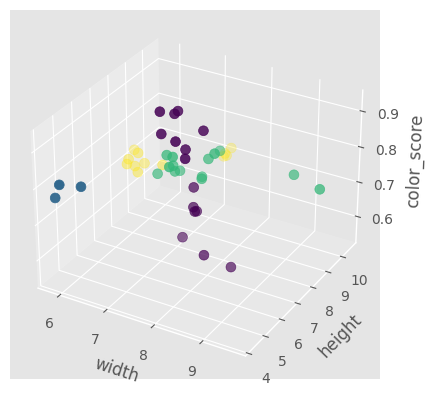

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, s = 50, marker = 'o')
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create Train-Test Split

In [42]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Create Classifier Object

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

### Train the Classifier using the Training Data (fit the estimator)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Estimate Accuracy

In [30]:
knn.score(X_test, y_test)

0.5333333333333333

### Classify New Data

In [31]:
fruit_prediction = knn.predict([[20, 3.5, 6.8]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [32]:
fruit_prediction = knn.predict([[100, 6.5, 8.8]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Accuracy vs Different Choices of the K-Value

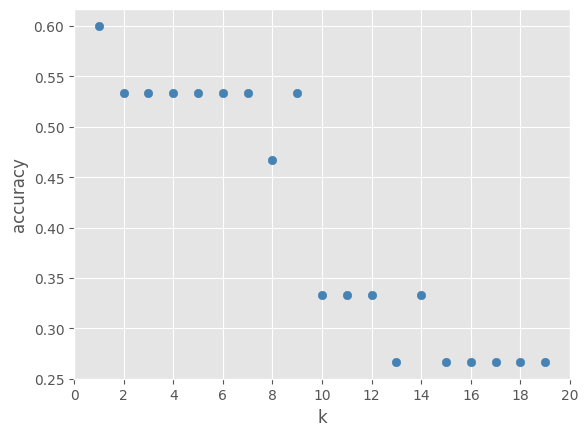

In [43]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores, color = 'steelblue')
plt.xticks(range(0, 21, 2))
plt.show()